<a href="https://colab.research.google.com/github/meena25091992/credit_card_defalut_prediction/blob/main/Individual_Copy_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [8]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [9]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Meenakshi_Supervised_Classification_ML_Project/default of credit card clients.xls'

In [11]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [12]:
# Reading our Dataset
credit_data = pd.read_excel(file_path, header=1)

In [13]:
# head gives the top 5 rows of the given dataset
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
#info() print the basic information of our DataFrame
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:
# describe() gives the overall descriptive summary of the dataframe
credit_data.describe(include='all').T    # As there are 25 columns in dataset and all are numerical so we tranform it 


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [16]:
#  Shape give the total number of rows and columns
print('Rows {} , Columns {}'.format(credit_data.shape[0], credit_data.shape[1]))



Rows 30000 , Columns 25


In [17]:
# Print names of each column in a list
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [18]:
# Checking the total null values in our dataset.
credit_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [19]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset is:',len(credit_data[credit_data.duplicated()]))

Duplicate values in our dataset is: 0


In [20]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).all(1)
    return df[indices_to_keep].astype(np.float64)

In [21]:
clean_dataset(credit_data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996.0,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997.0,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998.0,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999.0,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [22]:
# Creating a copy of dataframe
credit_defaulter_df = credit_data.copy()

In [23]:
credit_defaulter_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
# renaming the column feature for better understanding
credit_defaulter_df.rename(columns = {'default payment next month':'Defaulter_Payment','PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN',
                     
                   'PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',

                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG',
                   
                   'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} ,inplace=True )




In [25]:
credit_defaulter_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter_Payment
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [26]:
credit_defaulter_df['Defaulter_Payment'].value_counts()


0    23364
1     6636
Name: Defaulter_Payment, dtype: int64

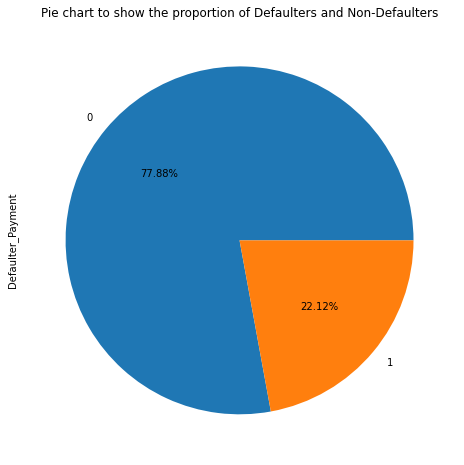

In [27]:
# plot pie chart to show the proportion of Defaulters and Non-Defaulters
# replace '0' with 'Non-Defaulter' and '1' with 'Defaulter' 

credit_defaulter_df['Defaulter'] = credit_defaulter_df.Defaulter_Payment.replace([1,0], ['Defaulter', 'Non-Defaulter'])
credit_defaulter_df['Defaulter_Payment'].value_counts().plot(kind="pie",autopct='%1.2f%%',figsize=(8,8))
plt.title("Pie chart to show the proportion of Defaulters and Non-Defaulters")
plt.show()

In [28]:
credit_defaulter_df.groupby(['LIMIT_BAL', 'Defaulter']).size().unstack()

Defaulter,Defaulter,Non-Defaulter
LIMIT_BAL,,
10000,197.0,296.0
16000,NaN,2.0
20000,698.0,1278.0
30000,568.0,1042.0
40000,92.0,138.0
...,...,...
750000,NaN,4.0
760000,NaN,1.0
780000,NaN,2.0


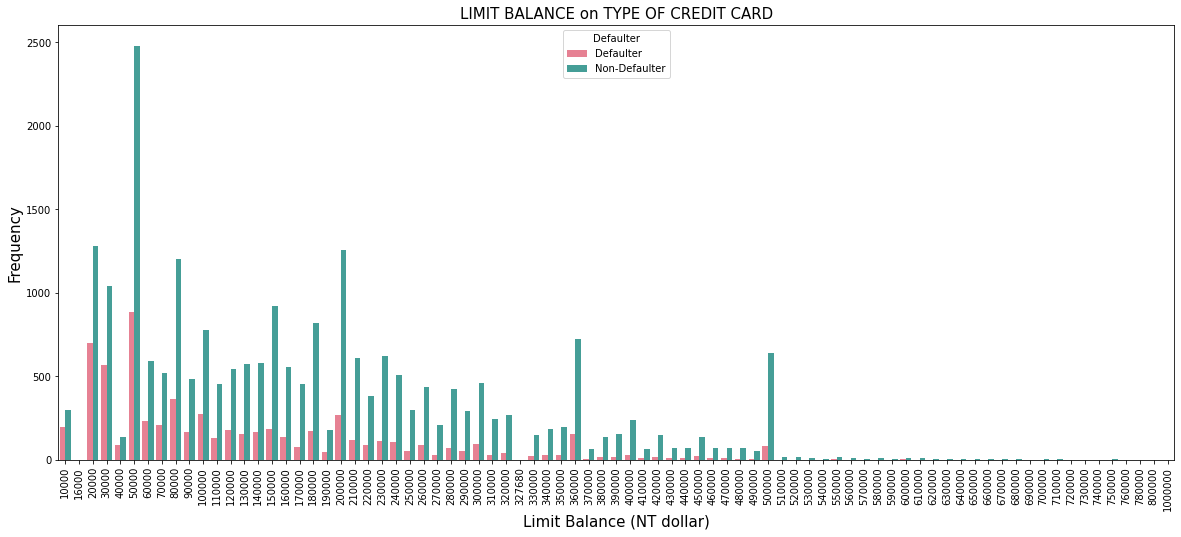

In [29]:
# plotting the count plot to vizualize the data distribution with respect to Limit Balance
plt.figure(figsize=[20, 8])
sns.countplot( x='LIMIT_BAL', hue = 'Defaulter',data =credit_defaulter_df, palette = 'husl')
plt.xticks(rotation = 90)
plt.xlabel('Limit Balance (NT dollar)', SIZE=15)
plt.ylabel('Frequency', SIZE=15)
plt.title('LIMIT BALANCE on TYPE OF CREDIT CARD', SIZE=15)
plt.show()



In [30]:
print('SEX column distribution : 1=Male, 2=Female')
credit_defaulter_df['SEX'].value_counts()



SEX column distribution : 1=Male, 2=Female


2    18112
1    11888
Name: SEX, dtype: int64

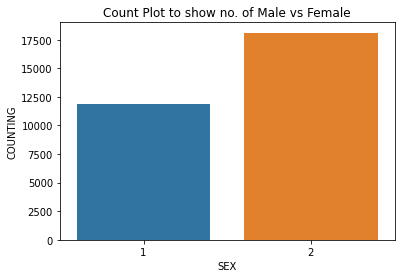

In [31]:
sns.countplot(credit_defaulter_df['SEX'])
plt.title("Count Plot to show no. of Male vs Female")
plt.ylabel("COUNTING")
plt.show()

In [32]:
print('EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown')
credit_defaulter_df['EDUCATION'].value_counts()

EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [33]:
credit_defaulter_df["EDUCATION"]=credit_defaulter_df["EDUCATION"].replace({4:0,5:0,6:0})

In [34]:
credit_defaulter_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

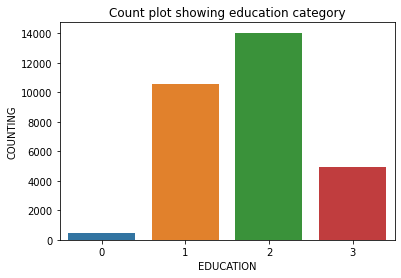

In [35]:
sns.countplot(credit_defaulter_df['EDUCATION'])
plt.title("Count plot showing education category")
plt.ylabel("COUNTING")
plt.show()

In [36]:
credit_defaulter_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [37]:
credit_defaulter_df['MARRIAGE']=credit_defaulter_df['MARRIAGE'].replace({0:3})

In [38]:
credit_defaulter_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

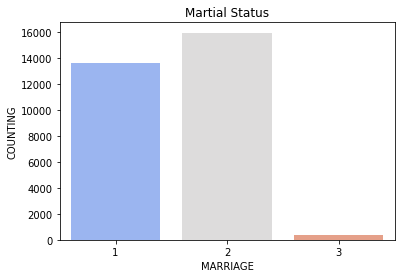

In [39]:
sns.countplot(credit_defaulter_df['MARRIAGE'],palette = 'coolwarm')
plt.title("Martial Status")
plt.ylabel("COUNTING")
plt.show()

In [40]:
credit_defaulter_df.groupby('SEX')['Defaulter'].value_counts()

SEX  Defaulter    
1    Non-Defaulter     9015
     Defaulter         2873
2    Non-Defaulter    14349
     Defaulter         3763
Name: Defaulter, dtype: int64

Text(0.5, 1.0, 'Distribution of Male vs Female Defaulters ')

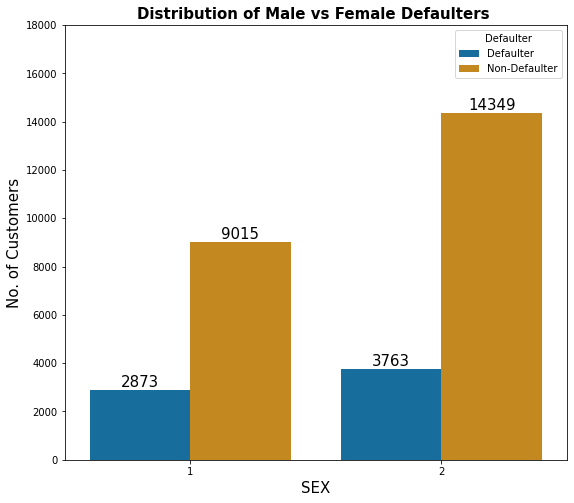

In [41]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=credit_defaulter_df,  palette = 'colorblind', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("SEX", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of Male vs Female Defaulters ',weight ='bold', fontsize= 15)


In [42]:
print(credit_defaulter_df.groupby(['EDUCATION', 'Defaulter']).size().unstack()) 

Defaulter  Defaulter  Non-Defaulter
EDUCATION                          
0                 33            435
1               2036           8549
2               3330          10700
3               1237           3680


Text(0.5, 1.0, 'Distribution of defaulters education-wise ')

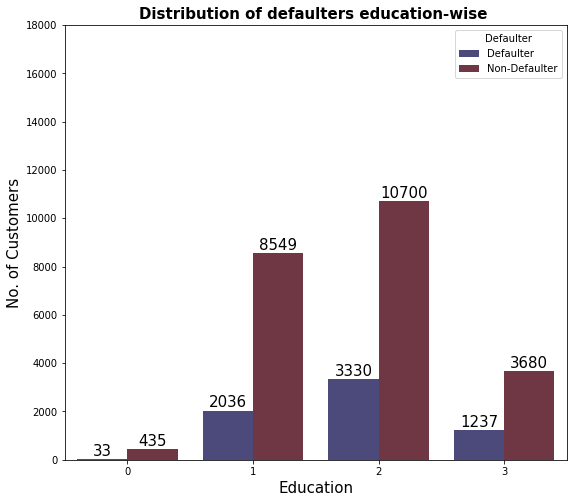

In [43]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x="EDUCATION", data=credit_defaulter_df,  palette = 'icefire', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("Education", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of defaulters education-wise ',weight ='bold', fontsize= 15)


In [44]:
print(credit_defaulter_df.groupby(['MARRIAGE', 'Defaulter']).size().unstack()) 

Defaulter  Defaulter  Non-Defaulter
MARRIAGE                           
1               3206          10453
2               3341          12623
3                 89            288


Text(0.5, 1.0, 'Distribution of defaulters acc. to martial status')

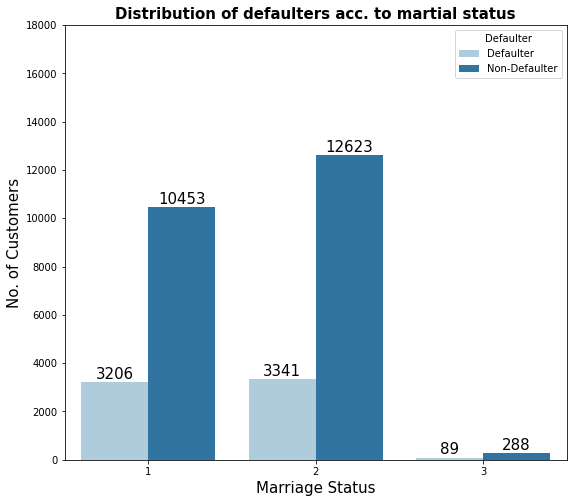

In [45]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x="MARRIAGE", data=credit_defaulter_df,  palette = 'Paired', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("Marriage Status", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of defaulters acc. to martial status',weight ='bold', fontsize= 15)


In [46]:
# Here we groupby Age and Defaulter column to get number of defaults and non defaults. 
df_age =  credit_defaulter_df.groupby(['AGE', 'Defaulter']).size().unstack()
df_age.head(10)

Defaulter,Defaulter,Non-Defaulter
AGE,,
21,14.0,53.0
22,169.0,391.0
23,247.0,684.0
24,300.0,827.0
25,302.0,884.0
26,253.0,1003.0
27,313.0,1164.0
28,286.0,1123.0
29,313.0,1292.0


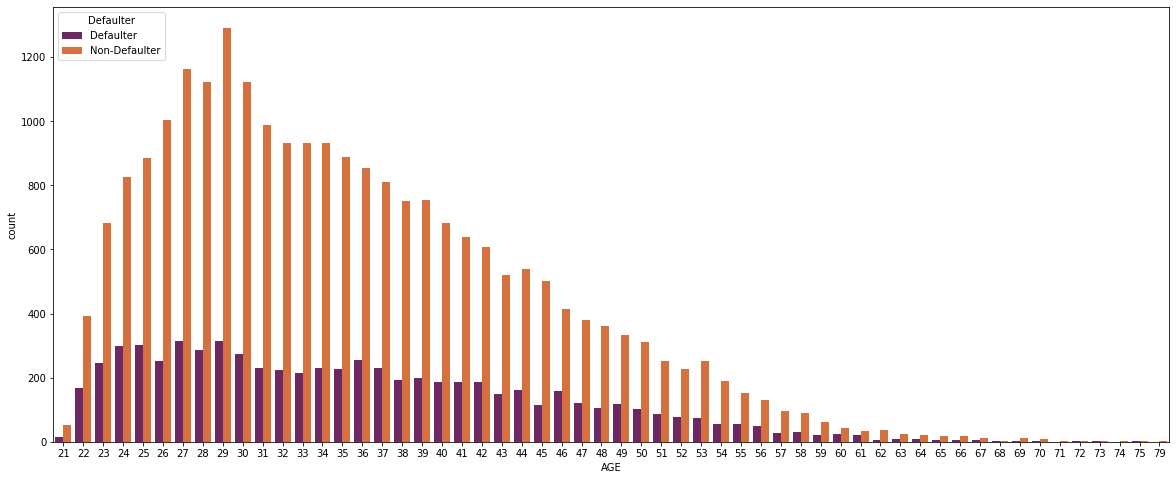

In [47]:
#plotting the count plot to vizualize the data distribution with respect to Age
plt.figure(figsize=[20, 8])
sns.countplot(x = 'AGE', hue = 'Defaulter',data =credit_defaulter_df, palette = 'inferno')

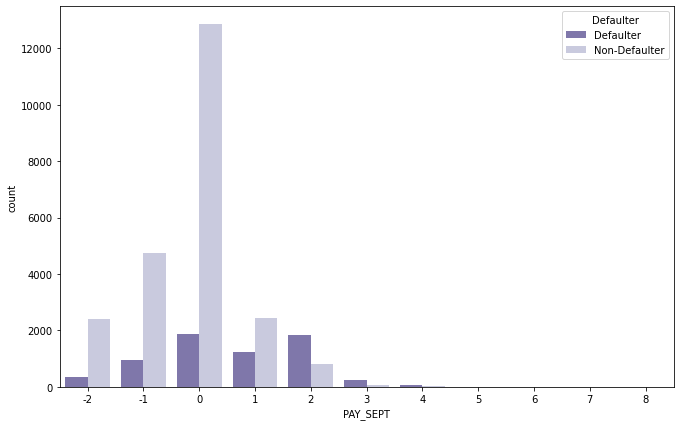

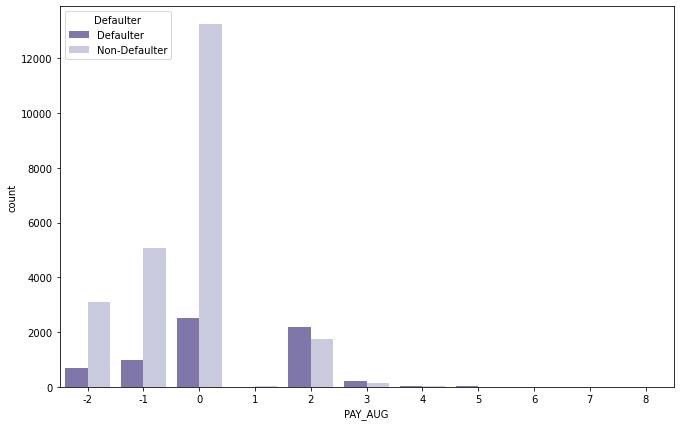

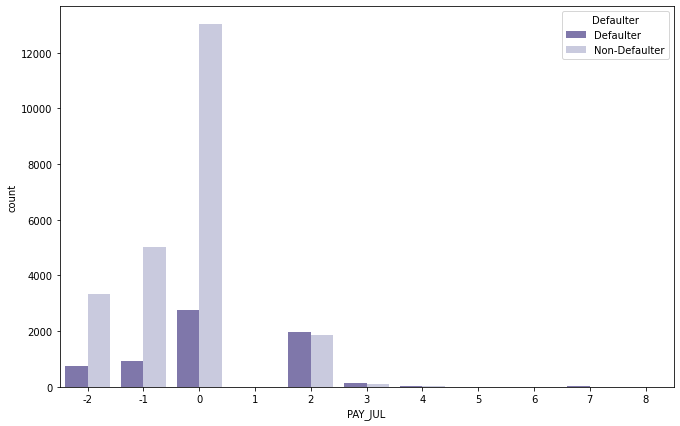

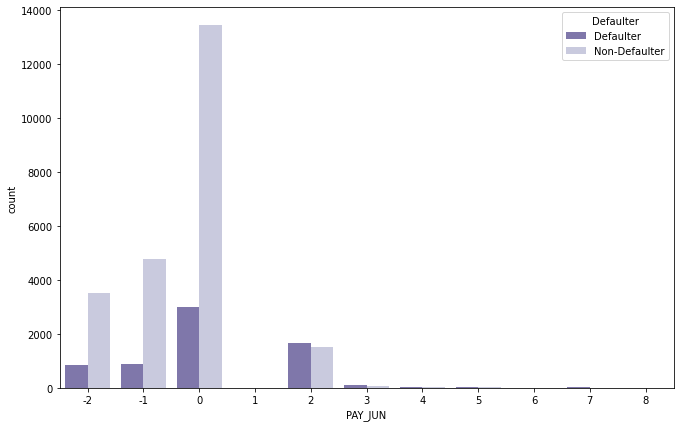

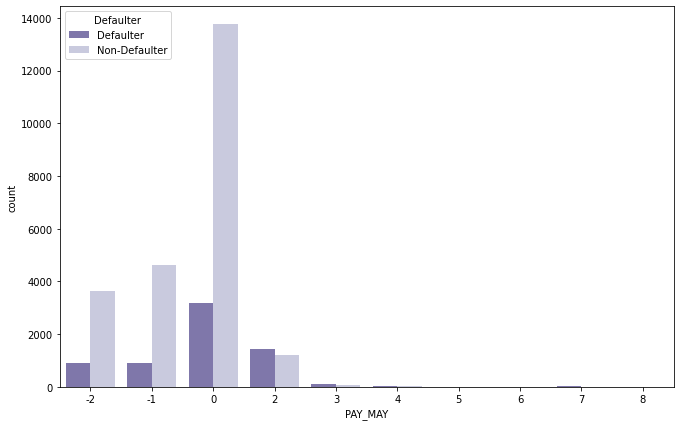

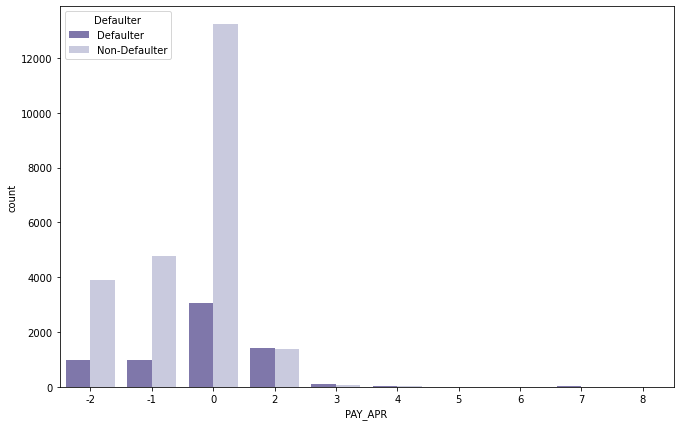

In [48]:
# looking at the payment columns for each month.
payment_column_list = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

# Plotting graph for payment columns 
for pay_column in payment_column_list:
  plt.figure(figsize=(11,7))
  sns.countplot(x = pay_column, hue = 'Defaulter', data = credit_defaulter_df ,palette = 'Purples_r')

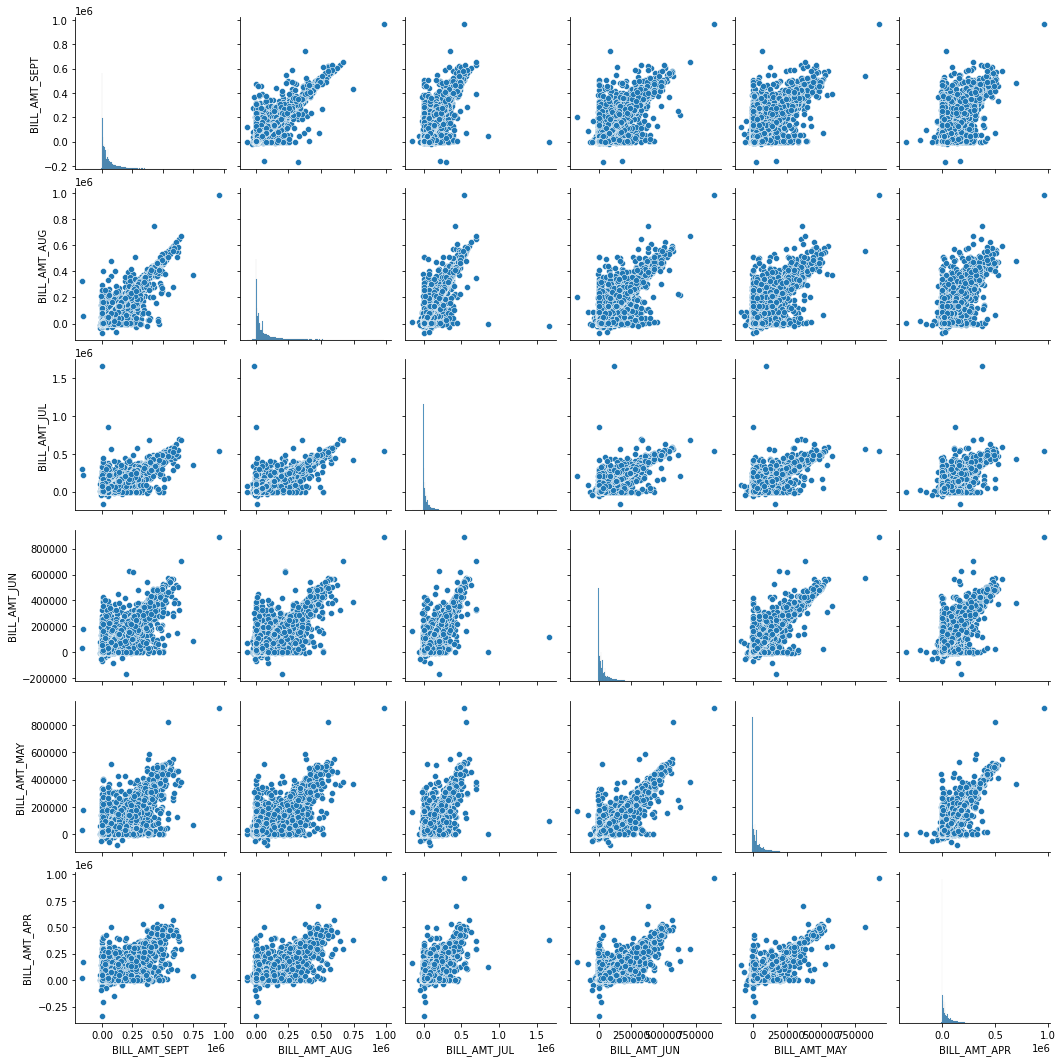

In [49]:
#assign the bill amount features to a single variable 
df_bill_amount = credit_defaulter_df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = df_bill_amount) #plotting the pair plot for bill amount

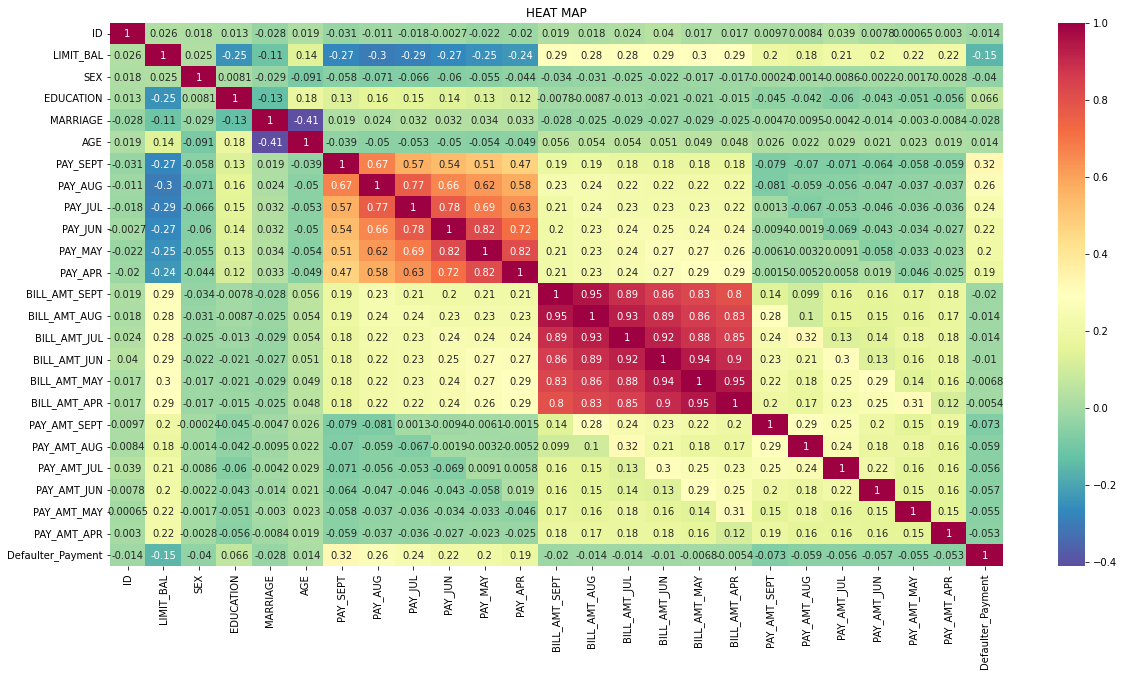

In [50]:
plt.figure (figsize= (20,10))
corelation= credit_defaulter_df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

In [51]:
#  Checking Inter-Quartile range value for "LIMIT_BAL" column 

Q1 = credit_defaulter_df['LIMIT_BAL'].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df['LIMIT_BAL'].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range
print(IQR)


190000.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text major ticklabel objects>)

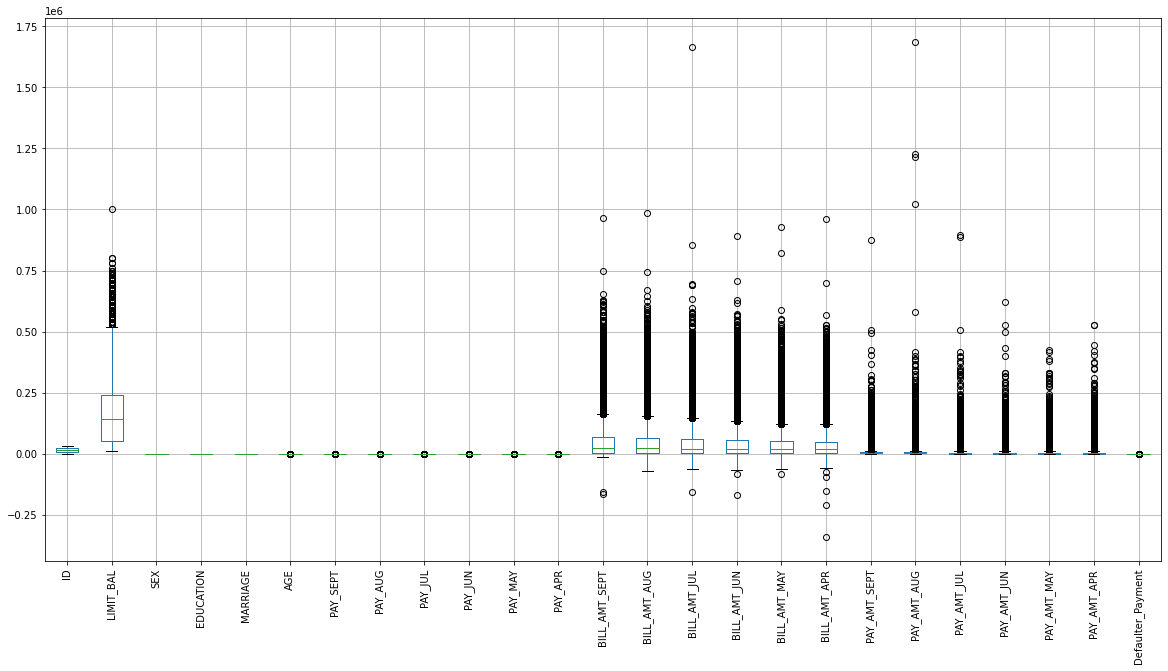

In [52]:
#  draw box plot to see if there is any outliers in our dataset
plt.figure (figsize= (20,10))
credit_defaulter_df.boxplot()
plt.xticks(rotation=90) #  rotate each value at x-axis to 90 degree angle

In [53]:
credit_defaulter_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Defaulter_Payment',
       'Defaulter'],
      dtype='object')

In [54]:
# creating list for columns having outliers
cols = ['LIMIT_BAL', 'BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
                 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY',
                 'PAY_AMT_APR']
#  dropping outliers for columns which have outliers in our dataframe
Q1 = credit_defaulter_df[cols].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df[cols].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range

# using interquartile range to find outliers in the data and remove them
credit_defaulter_df = credit_defaulter_df[~((credit_defaulter_df[cols] < (Q1 - 1.5 * IQR)) |(credit_defaulter_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
 

In [55]:
#  dropping outliers for "LIMIT_BAL" which have outliers in our dataframe
Q1 = credit_defaulter_df['LIMIT_BAL'].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df['LIMIT_BAL'].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range
print(IQR)


150000.0


In [56]:
credit_defaulter_df.shape

(19731, 26)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text major ticklabel objects>)

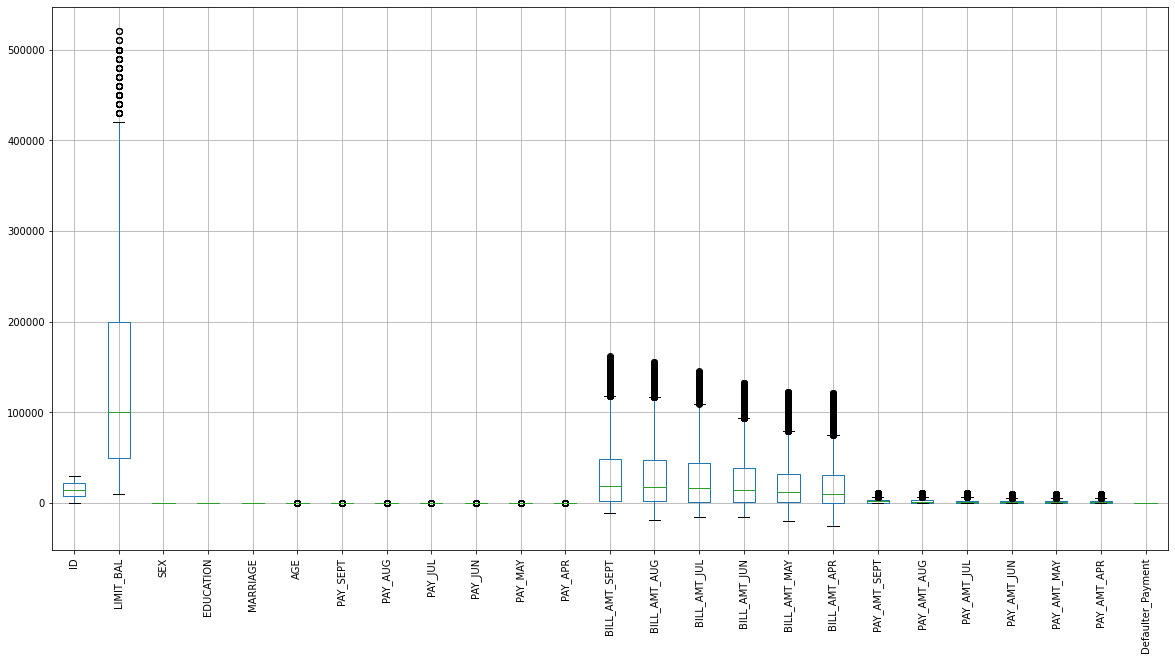

In [57]:
#  draw box plot to see if there is any outliers in our dataset
plt.figure (figsize= (20,10))
credit_defaulter_df.boxplot()
plt.xticks(rotation=90) #  rotate each value at x-axis to 90 degree angle

In [58]:
# removing some columns that are unimportant.
credit_defaulter_df.drop(['ID','Defaulter','AGE'], axis=1,inplace =True)

In [59]:
credit_defaulter_df.shape

(19731, 23)

In [60]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [61]:
calc_vif(credit_defaulter_df[[i for i in credit_defaulter_df.describe().columns if i not in ['Defaulter_Payment']]])

,variables,VIF
0,LIMIT_BAL,2.898259
1,SEX,8.433152
2,EDUCATION,5.599418
3,MARRIAGE,6.313003
4,PAY_SEPT,1.858743
5,PAY_AUG,3.509619
6,PAY_JUL,4.636735
7,PAY_JUN,5.607335
8,PAY_MAY,6.361494
9,PAY_APR,4.300316


In [62]:
credit_defaulter_df['TOTAL_BILL_PAY'] = credit_defaulter_df['BILL_AMT_SEPT'] + credit_defaulter_df['BILL_AMT_AUG'] + credit_defaulter_df['BILL_AMT_JUL'] + credit_defaulter_df['BILL_AMT_JUN'] +  credit_defaulter_df['BILL_AMT_MAY'] + credit_defaulter_df['BILL_AMT_APR'] 

In [63]:
calc_vif(credit_defaulter_df[[i for i in credit_defaulter_df.describe().columns if i not in ['Defaulter_Payment','BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]])

,variables,VIF
0,LIMIT_BAL,2.882937
1,SEX,8.424020
2,EDUCATION,5.587310
3,MARRIAGE,6.304269
4,PAY_SEPT,1.857488
5,PAY_AUG,3.435968
6,PAY_JUL,4.589257
7,PAY_JUN,5.588403
8,PAY_MAY,6.322405
9,PAY_APR,4.217279


In [64]:
#get dummies variable
credit_defaulter_df = pd.get_dummies(credit_defaulter_df,columns=['EDUCATION','SEX','MARRIAGE'])

In [65]:
credit_defaulter_df

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,TOTAL_BILL_PAY,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,7704,0,0,1,0,0,1,1,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,17077,0,0,1,0,0,1,0,1,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,101653,0,0,1,0,0,1,0,1,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,231334,0,0,1,0,0,1,1,0,0
5,50000,0,0,0,0,0,0,64400,57069,57608,...,238114,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000,3,2,2,2,2,2,2500,2500,2500,...,15000,0,0,1,0,1,0,1,0,0
29992,10000,0,0,0,-2,-2,-2,8802,10400,0,...,19202,0,0,0,1,1,0,1,0,0
29994,80000,2,2,2,2,2,2,72557,77708,79384,...,470933,0,0,1,0,1,0,0,1,0
29996,150000,-1,-1,-1,-1,0,0,1683,1828,3502,...,21182,0,0,0,1,1,0,0,1,0


In [66]:
credit_defaulter_df['Defaulter_Payment'].value_counts()

0    14626
1     5105
Name: Defaulter_Payment, dtype: int64

In [67]:
# creating dependent variable and independent variable
independent_variables = credit_defaulter_df.drop(['Defaulter_Payment'],axis=1)

dependent_variable = credit_defaulter_df['Defaulter_Payment']

In [68]:
dependent_variable

0        1
1        1
2        0
3        0
5        0
        ..
29991    1
29992    0
29994    1
29996    0
29999    1
Name: Defaulter_Payment, Length: 19731, dtype: int64

In [69]:
#applying zscore to each values of independent variable 

from scipy.stats import zscore  # zcore is used for scaling the data
X = round(independent_variables.apply(zscore),3)

In [70]:
# applying log on dependent variable 

Y = dependent_variable


In [71]:
# This method is used to split the dataset into training and test set while buliding the model

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (15784, 29)
X_test:  (3947, 29)


In [72]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,Y_train_sm = smote.fit_resample(X,Y)

from collections import Counter
print('Original dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(Y_train_sm))
Counter(Y_train_sm)

Original dataset shape Counter({0: 11750, 1: 4034})
Resample dataset shape Counter({1: 14626, 0: 14626})


Counter({0: 14626, 1: 14626})

In [73]:
# Importing packages
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc , classification_report

In [74]:
# Creating empty data frame for each regression model 
i=0
evaluation_metrices_df = pd.DataFrame()

In [75]:
def print_metrics(actual, predicted):

  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print(' precision_score is {}'.format( precision_score(actual, predicted)))
 
  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual , predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))

  # evaluation matrix 

  """  This function is also inserting evaluation metrices of each applied model in 
       empty dataframe create above named as "evaluation_metrices_df"  
  """

  evaluation_metrices_df.loc[i,"Accuracy Score"] = format(accuracy_score(actual, predicted))
  evaluation_metrices_df.loc[i,"Precision Score"] = format( precision_score(actual, predicted))
  evaluation_metrices_df.loc[i,"Recall Score"] = format(recall_score(actual, predicted))
  evaluation_metrices_df.loc[i,"F1 Score"] = format(f1_score(actual, predicted))
  evaluation_metrices_df.loc[i,"RUC_AUC_Score"] = format( roc_auc_score(actual , predicted))
  
  return


# Logistics Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }   #set the parmeter

logistic_model= GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train_sm, Y_train_sm)            #fit the model 

Fitting 3 folds for each of 34 candidates, totalling 102 fits


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [77]:
logistic_model.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced')

In [78]:
logistic_model.best_params_   # best_params will give you the best value from all those combination

{'C': 0.001, 'penalty': 'l2'}

In [79]:
logistic_model.score(X_train_sm, Y_train_sm)

0.6687405989334063

In [80]:
# model score on testing data
print(f"testing_model_score:  {logistic_model.score(X_test,Y_test)}")

testing_model_score:  0.6676003734827264


In [81]:
logistic_model.best_score_

0.6690137495354885

In [82]:
 # to predict the probability
Y_train_preds_logistic = logistic_model.predict_proba(X_train_sm)[:,1]
Y_test_preds_logistic = logistic_model.predict_proba(X_test)[:,1]

In [83]:
Y_train_preds_logistic

array([0.77623066, 0.50391503, 0.44280017, ..., 0.50387365, 0.55148033,
       0.74016438])

In [84]:
Y_test_preds_logistic

array([0.8928017 , 0.56476215, 0.25867862, ..., 0.50591527, 0.38596153,
       0.44682166])

In [85]:
# Get the y- train & test predicted values
Y_train_class_preds = logistic_model.predict(X_train_sm)
Y_test_class_preds = logistic_model.predict(X_test)



In [86]:
Y_train_class_preds

array([1, 1, 0, ..., 1, 1, 1])

In [87]:
Y_test_class_preds 

array([1, 1, 0, ..., 1, 0, 0])

In [88]:
# accuracy score of train set and test set
logistic_train_accuracy= accuracy_score(Y_train_sm, Y_train_class_preds)
logistic_test_accuracy= accuracy_score(Y_test, Y_test_class_preds)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.6797483932722549
The accuracy on test data is  0.6812769191791234


In [89]:
# print metrics for training data
print_metrics(Y_train_sm,Y_train_class_preds)

accuracy_score is 0.6797483932722549
 precision_score is 0.6837947427293065
recall_score is 0.6687405989334063
f1_score is 0.676183892153474
roc_auc_score is 0.6797483932722549
confusion_matrix is [[10103  4523]
 [ 4845  9781]]
classification_report is               precision    recall  f1-score   support

           0       0.68      0.69      0.68     14626
           1       0.68      0.67      0.68     14626

    accuracy                           0.68     29252
   macro avg       0.68      0.68      0.68     29252
weighted avg       0.68      0.68      0.68     29252



[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

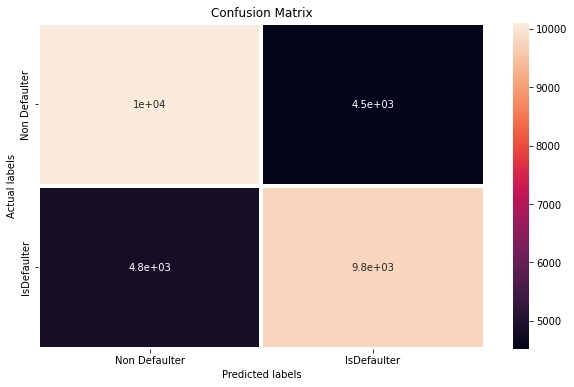

In [90]:
# Get the confusion matrix for logistic 
labels = ['Non Defaulter', 'IsDefaulter']
cm = confusion_matrix(Y_train_sm,Y_train_class_preds)
plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, lw = 3) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

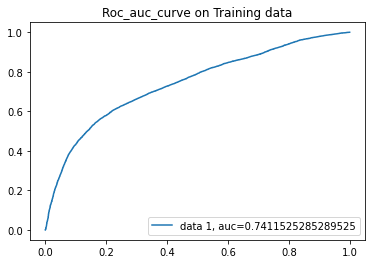

In [91]:
# Plot Roc_auc_curve for training data
y_train_pred = logistic_model.predict_proba(X_train_sm)[:,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  Y_train_preds_logistic )
auc = roc_auc_score(Y_train_sm,  Y_train_preds_logistic  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [92]:
# print metrics for training data
print_metrics(Y_test,Y_test_class_preds)

accuracy_score is 0.6812769191791234
 precision_score is 0.4421768707482993
recall_score is 0.6676003734827264
f1_score is 0.5319940476190476
roc_auc_score is 0.6769851658790544
confusion_matrix is [[1974  902]
 [ 356  715]]
classification_report is               precision    recall  f1-score   support

           0       0.85      0.69      0.76      2876
           1       0.44      0.67      0.53      1071

    accuracy                           0.68      3947
   macro avg       0.64      0.68      0.65      3947
weighted avg       0.74      0.68      0.70      3947



[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

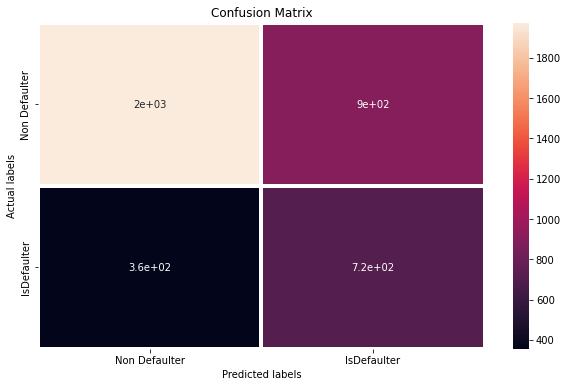

In [93]:
# Get the confusion matrix for logistic 
labels = ['Non Defaulter', 'IsDefaulter']
cm = confusion_matrix(Y_test,Y_test_class_preds)
plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, lw = 3) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

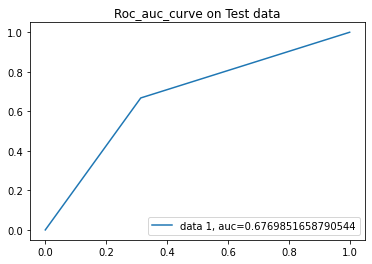

In [94]:
#Plot Roc_auc_curve for test data
y_train_pred = logistic_model.predict_proba(X_train_sm)[:,1]
fpr, tpr, _ = roc_curve(Y_test,Y_test_class_preds)
auc = roc_auc_score(Y_test,Y_test_class_preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Test data")
plt.legend(loc=4)
plt.show()

# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf= RandomForestClassifier() 
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
grid_rf = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
grid_rf.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [97]:
grid_rf.best_params_

{'max_depth': 14, 'n_estimators': 90}

In [98]:
optimized_rf=grid_rf.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14, n_estimators=90)

In [99]:
grid_rf.best_score_

0.7897279302098991

In [100]:
# model score  on training data
print(f"training_model_score:  {grid_rf.score(X_train_sm,Y_train_sm )}")

# model score on testing data
print(f"testing_model_score:  {grid_rf.score(X_test,Y_test)}")

training_model_score:  0.8913236701763982
testing_model_score:  0.8811755763871295


In [101]:
# to predict the classes either 1 or 0
# Get the predicted classes
Y_train_class_preds_rf = grid_rf.predict(X_train_sm)
Y_test_class_preds_rf = grid_rf.predict(X_test)

In [102]:
Y_test_class_preds_rf

array([1, 0, 0, ..., 0, 1, 0])

In [103]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [104]:
# Evaluation of training model
print_metrics(Y_train_sm,Y_train_class_preds_rf)

accuracy_score is 0.8913236701763982
 precision_score is 0.9130403406220683
recall_score is 0.8650348694106386
f1_score is 0.8883895657058596
roc_auc_score is 0.8913236701763982
confusion_matrix is [[13421  1205]
 [ 1974 12652]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.92      0.89     14626
           1       0.91      0.87      0.89     14626

    accuracy                           0.89     29252
   macro avg       0.89      0.89      0.89     29252
weighted avg       0.89      0.89      0.89     29252



[[13421  1205]
 [ 1974 12652]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

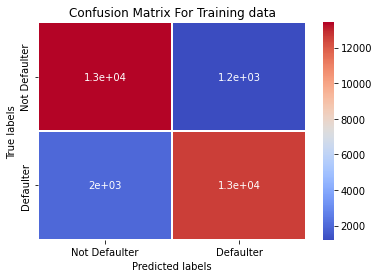

In [105]:
# Get the confusion matrix for  training  data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,Y_train_class_preds_rf)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

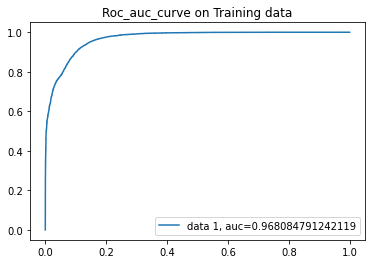

In [106]:
# Roc_auc_curve
y_train_preds_proba_rf = grid_rf.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_rf )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [107]:
features = X_train_sm.columns
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

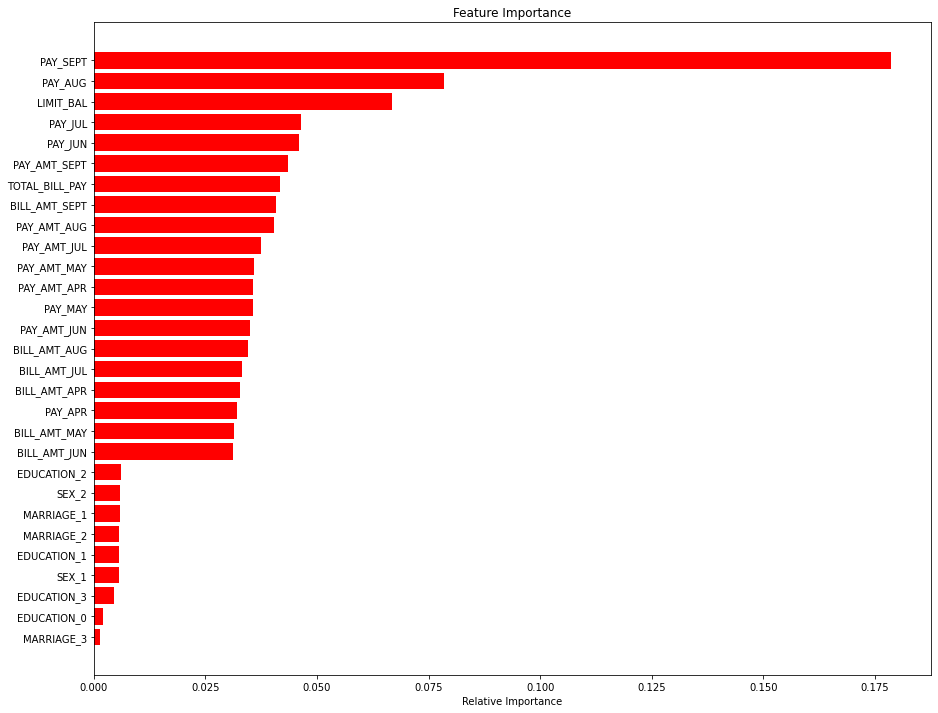

In [108]:
plt.figure (figsize= (15,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# KNN Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier()

In [111]:
#knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [112]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_sm,Y_train_sm)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [113]:
knn_cv.best_score_

0.7574531474746836

In [114]:
knn_cv.best_params_

{'n_neighbors': 5}

In [115]:
optimized_knn=knn_cv.best_estimator_
optimized_knn

KNeighborsClassifier()

In [116]:
# model score  on training data
print(f"training_model_score:  {knn_cv.score(X_train_sm,Y_train_sm )}")

training_model_score:  0.8507452481881581


In [117]:
# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test,Y_test)}")

testing_model_score:  0.7950342031922979


In [118]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_sm)
y_test_class_preds_knn = knn_cv.predict(X_test)

In [119]:
y_test_class_preds_knn

array([1, 1, 0, ..., 0, 1, 1])

In [120]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [121]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_knn)

accuracy_score is 0.8507452481881581
 precision_score is 0.7970813064628214
recall_score is 0.941063858881444
f1_score is 0.8631090487238979
roc_auc_score is 0.850745248188158
confusion_matrix is [[11122  3504]
 [  862 13764]]
classification_report is               precision    recall  f1-score   support

           0       0.93      0.76      0.84     14626
           1       0.80      0.94      0.86     14626

    accuracy                           0.85     29252
   macro avg       0.86      0.85      0.85     29252
weighted avg       0.86      0.85      0.85     29252



[[11122  3504]
 [  862 13764]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

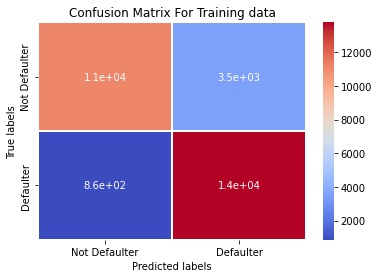

In [122]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

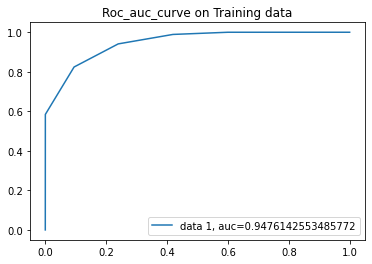

In [123]:
# Roc_auc_curve on taining data
y_train_preds_proba_knn = knn_cv.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_knn )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [124]:
# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_knn)

accuracy_score is 0.7950342031922979
 precision_score is 0.5775147928994083
recall_score is 0.911297852474323
f1_score is 0.706990220934444
roc_auc_score is 0.8315181891022518
confusion_matrix is [[2162  714]
 [  95  976]]
classification_report is               precision    recall  f1-score   support

           0       0.96      0.75      0.84      2876
           1       0.58      0.91      0.71      1071

    accuracy                           0.80      3947
   macro avg       0.77      0.83      0.77      3947
weighted avg       0.85      0.80      0.81      3947



[[2162  714]
 [  95  976]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

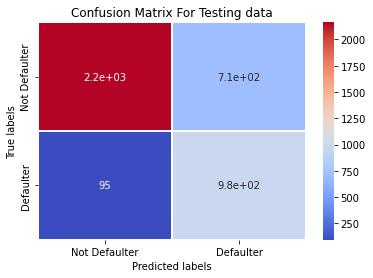

In [125]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

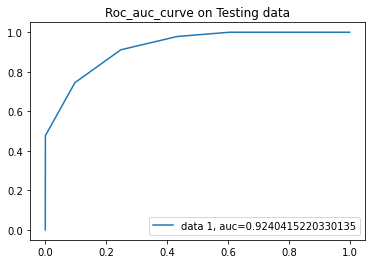

In [126]:
# Roc_auc_curve testing data
y_test_preds_proba_knn = knn_cv.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_knn )
auc = roc_auc_score(Y_test,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# Support Vector Machine

In [127]:
from sklearn import svm
 
#Create a svm Classifier
svm_model = svm.SVC(kernel = 'poly', gamma='scale', probability=True) 
 
#Train the model using the training sets
svm_model.fit(X_train_sm, Y_train_sm)

SVC(kernel='poly', probability=True)

In [128]:
svm_model.score(X_train_sm, Y_train_sm)

0.7322234377136606

In [129]:
# Get the y- train & test predicted values
y_train_preds_svm = svm_model.predict(X_train_sm)
y_test_preds_svm = svm_model.predict(X_test)

In [130]:
#get the accuracy score
svm_train_accuracy= accuracy_score(Y_train_sm, y_train_preds_svm)
svm_test_accuracy= accuracy_score(Y_test, y_test_preds_svm)

print("The accuracy on train data is ", svm_train_accuracy)
print("The accuracy on test data is ", svm_test_accuracy)

The accuracy on train data is  0.7322234377136606
The accuracy on test data is  0.7767925006333924


In [131]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_svm = svm_model.predict(X_train_sm)
y_test_class_preds_svm = svm_model.predict(X_test)

In [132]:
y_test_class_preds_svm

array([1, 1, 0, ..., 0, 1, 0])

In [133]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [134]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_svm)

accuracy_score is 0.7322234377136606
 precision_score is 0.7763853853039303
recall_score is 0.6523314645152468
f1_score is 0.7089726918075422
roc_auc_score is 0.7322234377136606
confusion_matrix is [[11878  2748]
 [ 5085  9541]]
classification_report is               precision    recall  f1-score   support

           0       0.70      0.81      0.75     14626
           1       0.78      0.65      0.71     14626

    accuracy                           0.73     29252
   macro avg       0.74      0.73      0.73     29252
weighted avg       0.74      0.73      0.73     29252



[[11878  2748]
 [ 5085  9541]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

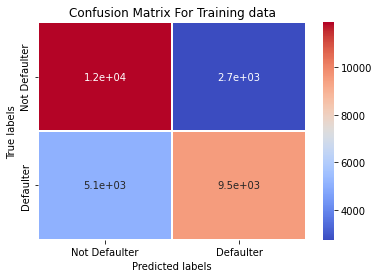

In [135]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_svm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

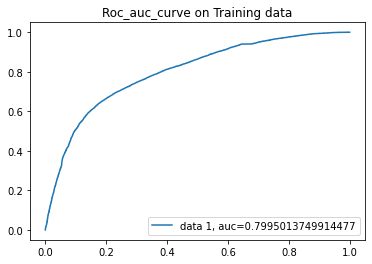

In [136]:
# Roc_auc_curve on taining data
y_train_preds_proba_svm = svm_model.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_svm )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_svm )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [137]:
# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_svm)

accuracy_score is 0.7767925006333924
 precision_score is 0.5751582278481012
recall_score is 0.6788048552754435
f1_score is 0.6226980728051392
roc_auc_score is 0.7460435959270125
confusion_matrix is [[2339  537]
 [ 344  727]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      2876
           1       0.58      0.68      0.62      1071

    accuracy                           0.78      3947
   macro avg       0.72      0.75      0.73      3947
weighted avg       0.79      0.78      0.78      3947



[[2162  714]
 [  95  976]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

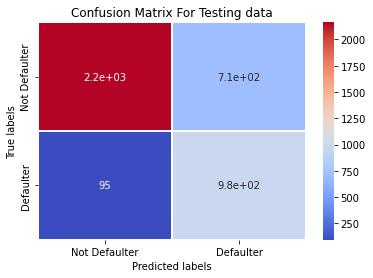

In [138]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

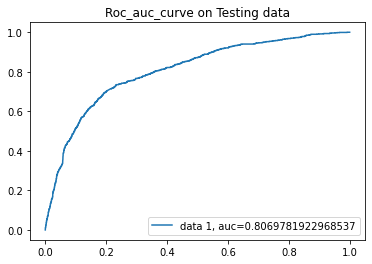

In [139]:
# Roc_auc_curve testing data
y_test_preds_proba_svm = svm_model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_svm )
auc = roc_auc_score(Y_test,  y_test_preds_proba_svm )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# Gaussian Naive Bayes Classifier

In [140]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB().fit(X_train_sm,Y_train_sm)

In [141]:
naive_bayes_model.score(X_train_sm, Y_train_sm)

0.634657459319021

In [142]:
# Get the y- train & test predicted values
y_train_preds_gaussian_nb = naive_bayes_model.predict(X_train_sm)
y_test_preds_gaussian_nb = naive_bayes_model.predict(X_test)

In [143]:
#get the accuracy score
nb_train_accuracy = accuracy_score(Y_train_sm, y_train_preds_gaussian_nb)
nb_test_accuracy = accuracy_score(Y_test, y_test_preds_gaussian_nb)

print("The accuracy on train data is ", nb_train_accuracy)
print("The accuracy on test data is ", nb_test_accuracy)

The accuracy on train data is  0.634657459319021
The accuracy on test data is  0.577400557385356


In [144]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_gaussian_nb = naive_bayes_model.predict(X_train_sm)
y_test_class_preds_gaussian_nb = naive_bayes_model.predict(X_test)

In [145]:
y_test_class_preds_gaussian_nb

array([1, 1, 0, ..., 1, 0, 0])

In [146]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [147]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_gaussian_nb)

accuracy_score is 0.634657459319021
 precision_score is 0.6104660945650345
recall_score is 0.7441542458635307
f1_score is 0.6707132953319982
roc_auc_score is 0.6346574593190208
confusion_matrix is [[ 7681  6945]
 [ 3742 10884]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.53      0.59     14626
           1       0.61      0.74      0.67     14626

    accuracy                           0.63     29252
   macro avg       0.64      0.63      0.63     29252
weighted avg       0.64      0.63      0.63     29252



[[ 7681  6945]
 [ 3742 10884]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

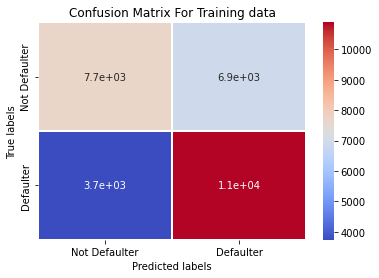

In [148]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_gaussian_nb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

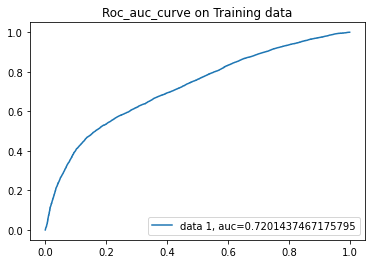

In [149]:
# Roc_auc_curve on taining data
y_train_preds_proba_gaussian_nb = naive_bayes_model.predict_proba(X_train_sm)[::,1]

fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_gaussian_nb )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_gaussian_nb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [150]:
# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_svm)

accuracy_score is 0.7767925006333924
 precision_score is 0.5751582278481012
recall_score is 0.6788048552754435
f1_score is 0.6226980728051392
roc_auc_score is 0.7460435959270125
confusion_matrix is [[2339  537]
 [ 344  727]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      2876
           1       0.58      0.68      0.62      1071

    accuracy                           0.78      3947
   macro avg       0.72      0.75      0.73      3947
weighted avg       0.79      0.78      0.78      3947



[[1474 1402]
 [ 266  805]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

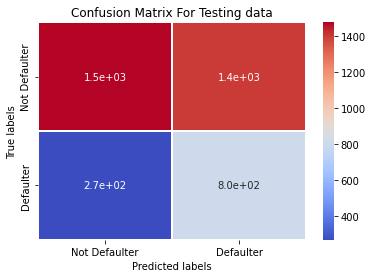

In [151]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_gaussian_nb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

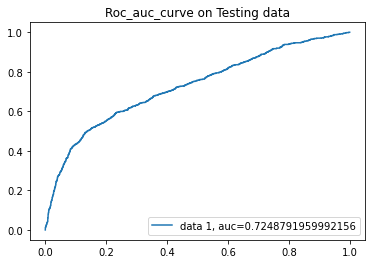

In [152]:
# Roc_auc_curve testing data
y_test_preds_proba_gaussian_nb = naive_bayes_model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_gaussian_nb )
auc = roc_auc_score(Y_test,  y_test_preds_proba_gaussian_nb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# Evaluation of all models

## Matrix comparision for train data

In [153]:
# print all records
evaluation_metrices_df 

,Accuracy Score,Precision Score,Recall Score,F1 Score,RUC_AUC_Score
0,0.7767925006333924,0.5751582278481012,0.6788048552754435,0.6226980728051392,0.7460435959270125
